In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lesson 15: Sampling 

In [2]:
united = Table.read_table('data/united.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')
united

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


## Non-Random (Deterministic) Sampling ##

In [3]:
united.where('Destination', 'JFK') 

Row,Date,Flight Number,Destination,Delay
26,6/1/15,502,JFK,-4
33,6/1/15,637,JFK,141
39,6/1/15,704,JFK,-8
50,6/1/15,758,JFK,-5
51,6/1/15,760,JFK,352
56,6/1/15,824,JFK,3
57,6/1/15,898,JFK,290
179,6/2/15,502,JFK,0
188,6/2/15,637,JFK,202
194,6/2/15,704,JFK,-11


In [4]:
united.take(np.arange(0, united.num_rows, 1000))

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1000,6/7/15,1692,EWR,7
2000,6/14/15,824,JFK,-1
3000,6/21/15,217,EWR,5
4000,6/27/15,1401,SAN,-4
5000,7/4/15,1614,LAS,-2
6000,7/11/15,401,CLE,4
7000,7/17/15,1645,IAD,0
8000,7/24/15,624,ORD,61
9000,7/30/15,1728,ORD,209


In [5]:
united.take(make_array(34, 6321, 10040))

Row,Date,Flight Number,Destination,Delay
34,6/1/15,650,AUS,44
6321,7/13/15,1124,SEA,-7
10040,8/6/15,1216,LAS,2


## Random Sample

### Systematic Sample

In [6]:
start = np.random.choice(np.arange(1000))
systematic_sample = united.take(np.arange(start, united.num_rows, 1000))
systematic_sample.show()

Row,Date,Flight Number,Destination,Delay
534,6/4/15,1247,SAN,-2
1534,6/11/15,489,ORD,6
2534,6/17/15,1743,LAX,0
3534,6/24/15,1149,IAD,60
4534,7/1/15,489,ORD,11
5534,7/8/15,611,SEA,-3
6534,7/14/15,1686,DCA,36
7534,7/21/15,788,BOS,0
8534,7/27/15,1937,IAH,7
9534,8/3/15,1073,BOS,7


### Simple Random Sample

In [7]:
united.sample(20)

Row,Date,Flight Number,Destination,Delay
7298,7/19/15,1796,IAD,5
11282,8/14/15,1029,DFW,17
10022,8/6/15,1062,MSP,1
2483,6/17/15,1192,LAX,-5
1399,6/10/15,759,EWR,-2
6581,7/15/15,361,LIH,-3
4036,6/27/15,1900,ORD,31
4898,7/3/15,1684,LIH,-6
6105,7/12/15,72,LAX,64
6512,7/14/15,1531,RDU,9


In [8]:
united.sample(20, with_replacement=False)

Row,Date,Flight Number,Destination,Delay
2716,6/19/15,209,LAX,0
8627,7/28/15,1168,EWR,-4
2869,6/19/15,1967,EWR,46
11822,8/18/15,228,ORD,88
6166,7/12/15,1060,IAH,-1
9125,7/31/15,1453,SEA,49
3525,6/24/15,1087,BWI,-1
10160,8/7/15,591,IAH,0
4534,7/1/15,489,ORD,11
11881,8/18/15,1120,BOS,31


## Distributions ##

In [9]:
die = Table().with_column('Face', np.arange(1, 7))
die

Face
1
2
3
4
5
6


In [10]:
die.sample(10)

Face
6
3
1
2
4
4
1
5
4
3


In [11]:
roll_bins = np.arange(0.5, 6.6, 1)

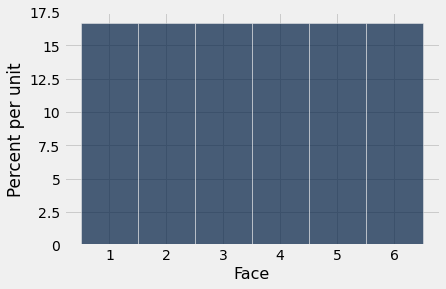

In [12]:
die.hist(bins=roll_bins)

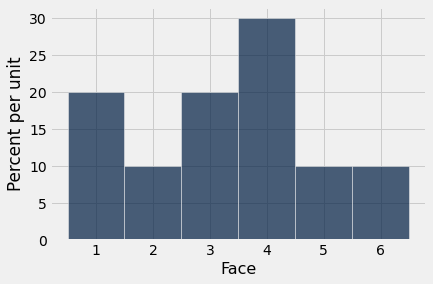

In [13]:
die.sample(10).hist(bins=roll_bins)

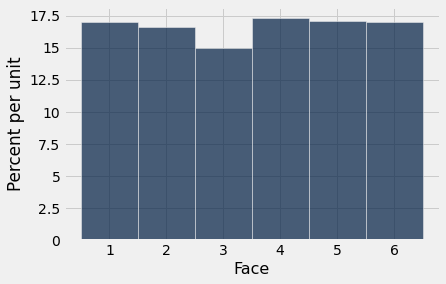

In [14]:
die.sample(1000).hist(bins=roll_bins)

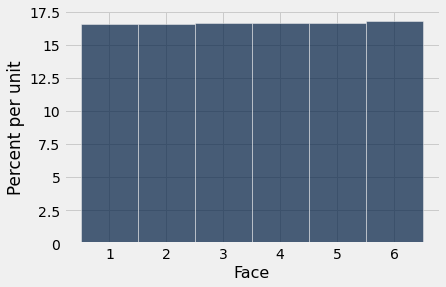

In [15]:
die.sample(100000).hist(bins=roll_bins)

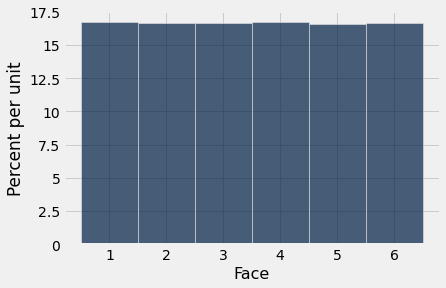

In [16]:
die.sample(1000000).hist(bins=roll_bins)

## Large Random Samples ##

In [17]:
united 

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


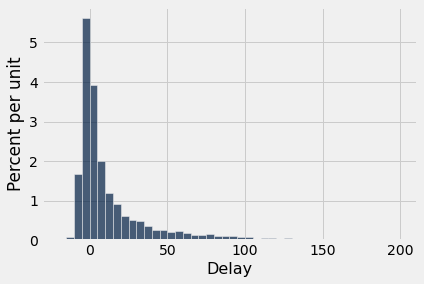

In [18]:
united_bins = np.arange(-20, 201, 5)
united.hist('Delay', bins = united_bins)

In [19]:
min(united.column('Delay'))

-16

In [20]:
max(united.column('Delay'))

580

In [21]:
np.average(united.column('Delay'))

16.658155515370705

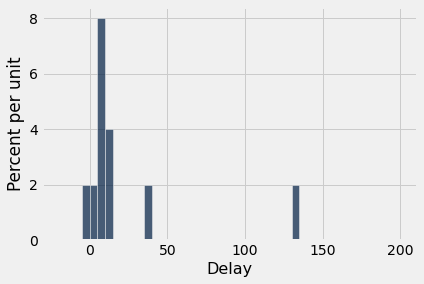

In [22]:
united.sample(10).hist('Delay', bins = united_bins)

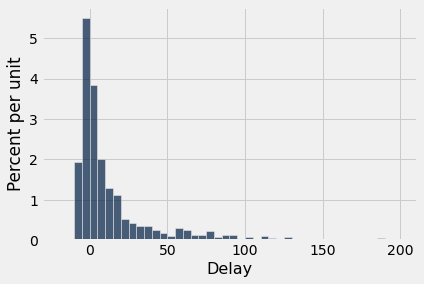

In [23]:
united.sample(1000).hist('Delay', bins = united_bins)